<h1 style="font-family:roboto;"> <center>Play Ground Series S3 E24
</center> </h1>
<h2><center style="color:#159364; font-family:roboto;"> :🚬 Binary Prediction of Smoker Status using Bio-Signals  🚬 </center></h2>

<p> This is my first real competetion i am no data sciencist its just a hobby for now i would love some feedback thank you for looking at my notebook!
</center>  </p>

In [56]:
import json
import datetime

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and pipeline utilities
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif

# Machine Learning Models
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ( ExtraTreesClassifier,StackingClassifier, VotingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import (
    LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, Perceptron, SGDClassifier
)
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Model Evaluation and Selection
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, auc, get_scorer,roc_auc_score
)

from catboost import CatBoostClassifier



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/smoker-status-prediction-using-biosignals/train_dataset.csv
/kaggle/input/smoker-status-prediction-using-biosignals/test_dataset.csv
/kaggle/input/playground-series-s3e24/sample_submission.csv
/kaggle/input/playground-series-s3e24/train.csv
/kaggle/input/playground-series-s3e24/test.csv


## Data set from the playground series
---

In [20]:
df1_train = pd.read_csv("/kaggle/input/playground-series-s3e24/train.csv")
df1_test = pd.read_csv("/kaggle/input/playground-series-s3e24/test.csv")
df1_test.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


## Original data set from  kaggle
---

In [21]:
df2_train = pd.read_csv("/kaggle/input/smoker-status-prediction-using-biosignals/train_dataset.csv")
df2_test = pd.read_csv("/kaggle/input/smoker-status-prediction-using-biosignals/test_dataset.csv")

### lets concat the playground and original dataset to get a bigger data set to work with

In [24]:
df2_train['id'] = np.nan
combined_train_df = pd.concat([df1_train, df2_train], axis=0)
combined_train_df = combined_train_df.reset_index(drop=True)
display(combined_train_df.head())
display(combined_train_df.tail())

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0.0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1.0,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2.0,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3.0,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4.0,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
198235,NaN,40,165,60,80.0,0.4,0.6,1,1,107,...,61,72,12.3,1,0.5,18,18,21,1,0
198236,NaN,45,155,55,75.0,1.5,1.2,1,1,126,...,76,131,12.5,2,0.6,23,11,12,0,0
198237,NaN,40,170,105,124.0,0.6,0.5,1,1,141,...,48,138,17.1,1,0.8,24,23,35,1,1
198238,NaN,40,160,55,75.0,1.5,1.5,1,1,95,...,79,116,12.0,1,0.6,24,20,17,0,1
198239,NaN,55,175,60,81.1,1.0,1.0,1,1,114,...,64,137,13.9,1,1.0,18,12,16,0,1


## Intial Data Exploration
___

In [9]:
def analyze_dataframe(df):
    """
    Analyze a pandas DataFrame and provide a summary of its characteristics.

    Parameters:
    df (pandas.DataFrame): The input DataFrame to analyze.

    Returns:
    None
    """
    print("DataFrame Information:")
    print("______________________")
    display(df.info(verbose=True, show_counts=True))
    print("\n")
    
    print("DataFrame Head:")
    print("______________________")
    display(df.head())
    print("\n")

    print("DataFrame Tail:")
    print("______________________")
    display(df.tail())
    print("\n")

    print("DataFrame Description:")
    print("______________________")
    display(df.describe().T)
    print("\n")

    print("Number of Null Values:")
    print("______________________")
    display(df.isnull().sum())
    print("\n")

    print("Number of Duplicated Rows:")
    print("______________________")
    display(df.duplicated().sum())
    print("\n")

    print("Number of Unique Values:")
    print("______________________")
    display(df.nunique())
    print("\n")

    print("DataFrame Shape:")
    print("______________________")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# graph out to find outliers
# Usage
analyze_dataframe(combined_train_df)

DataFrame Information:
______________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198240 entries, 0 to 198239
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  float64
 1   age                  198240 non-null  int64  
 2   height(cm)           198240 non-null  int64  
 3   weight(kg)           198240 non-null  int64  
 4   waist(cm)            198240 non-null  float64
 5   eyesight(left)       198240 non-null  float64
 6   eyesight(right)      198240 non-null  float64
 7   hearing(left)        198240 non-null  int64  
 8   hearing(right)       198240 non-null  int64  
 9   systolic             198240 non-null  int64  
 10  relaxation           198240 non-null  int64  
 11  fasting blood sugar  198240 non-null  int64  
 12  Cholesterol          198240 non-null  int64  
 13  triglyceride         198240 non-null  int64  
 14  HDL                  1

None



DataFrame Head:
______________________


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0.0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1.0,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2.0,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3.0,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4.0,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1




DataFrame Tail:
______________________


,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
198235,NaN,40,165,60,80.0,0.4,0.6,1,1,107,...,61,72,12.3,1,0.5,18,18,21,1,0
198236,NaN,45,155,55,75.0,1.5,1.2,1,1,126,...,76,131,12.5,2,0.6,23,11,12,0,0
198237,NaN,40,170,105,124.0,0.6,0.5,1,1,141,...,48,138,17.1,1,0.8,24,23,35,1,1
198238,NaN,40,160,55,75.0,1.5,1.5,1,1,95,...,79,116,12.0,1,0.6,24,20,17,0,1
198239,NaN,55,175,60,81.1,1.0,1.0,1,1,114,...,64,137,13.9,1,1.0,18,12,16,0,1




DataFrame Description:
______________________


,count,mean,std,min,25%,50%,75%,max
id,159256.0,79627.500000,45973.391572,0.0,39813.75,79627.5,119441.25,159255.0
age,198240.0,44.271418,11.886308,20.0,40.00,40.0,55.00,85.0
height(cm),198240.0,165.153375,8.895587,130.0,160.00,165.0,170.00,190.0
weight(kg),198240.0,66.906709,12.656868,30.0,55.00,65.0,75.00,135.0
waist(cm),198240.0,82.817163,9.039363,51.0,77.00,83.0,89.00,129.0
eyesight(left),198240.0,1.007599,0.422827,0.1,0.80,1.0,1.20,9.9
eyesight(right),198240.0,1.002519,0.414241,0.1,0.80,1.0,1.20,9.9
hearing(left),198240.0,1.024248,0.153820,1.0,1.00,1.0,1.00,2.0
hearing(right),198240.0,1.023966,0.152943,1.0,1.00,1.0,1.00,2.0
systolic,198240.0,122.301488,12.920634,71.0,113.00,121.0,130.00,233.0




Number of Null Values:
______________________


id                     38984
age                        0
height(cm)                 0
weight(kg)                 0
waist(cm)                  0
eyesight(left)             0
eyesight(right)            0
hearing(left)              0
hearing(right)             0
systolic                   0
relaxation                 0
fasting blood sugar        0
Cholesterol                0
triglyceride               0
HDL                        0
LDL                        0
hemoglobin                 0
Urine protein              0
serum creatinine           0
AST                        0
ALT                        0
Gtp                        0
dental caries              0
smoking                    0
dtype: int64



Number of Duplicated Rows:
______________________


5517



Number of Unique Values:
______________________


id                     159256
age                        18
height(cm)                 15
weight(kg)                 29
waist(cm)                 548
eyesight(left)             20
eyesight(right)            18
hearing(left)               2
hearing(right)              2
systolic                  128
relaxation                 94
fasting blood sugar       259
Cholesterol               279
triglyceride              393
HDL                       123
LDL                       286
hemoglobin                144
Urine protein               6
serum creatinine           34
AST                       196
ALT                       230
Gtp                       444
dental caries               2
smoking                     2
dtype: int64



DataFrame Shape:
______________________
Rows: 198240, Columns: 24


## drop dupilcated rows

In [10]:
combined_train_df.drop_duplicates(inplace=True)

# EDA
___

## Correlation Heatmap of data

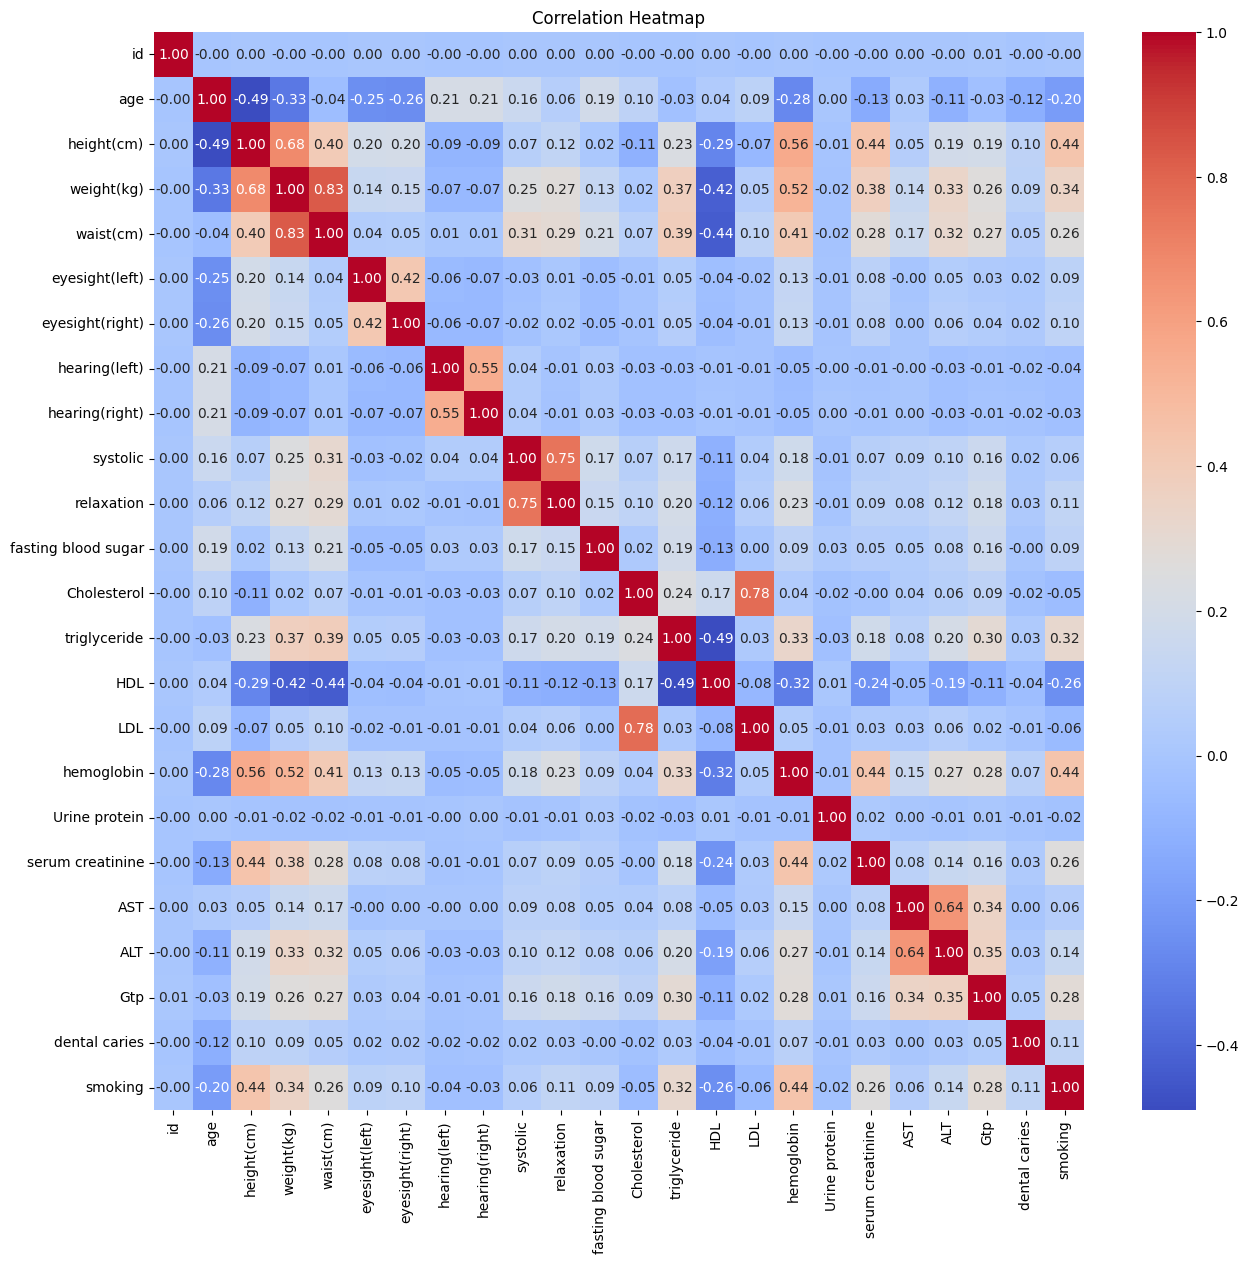

In [11]:
corr = combined_train_df.corr()
plt.figure(figsize=(15,14))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## EDA to look for outliers, weird data, and to check assumptions

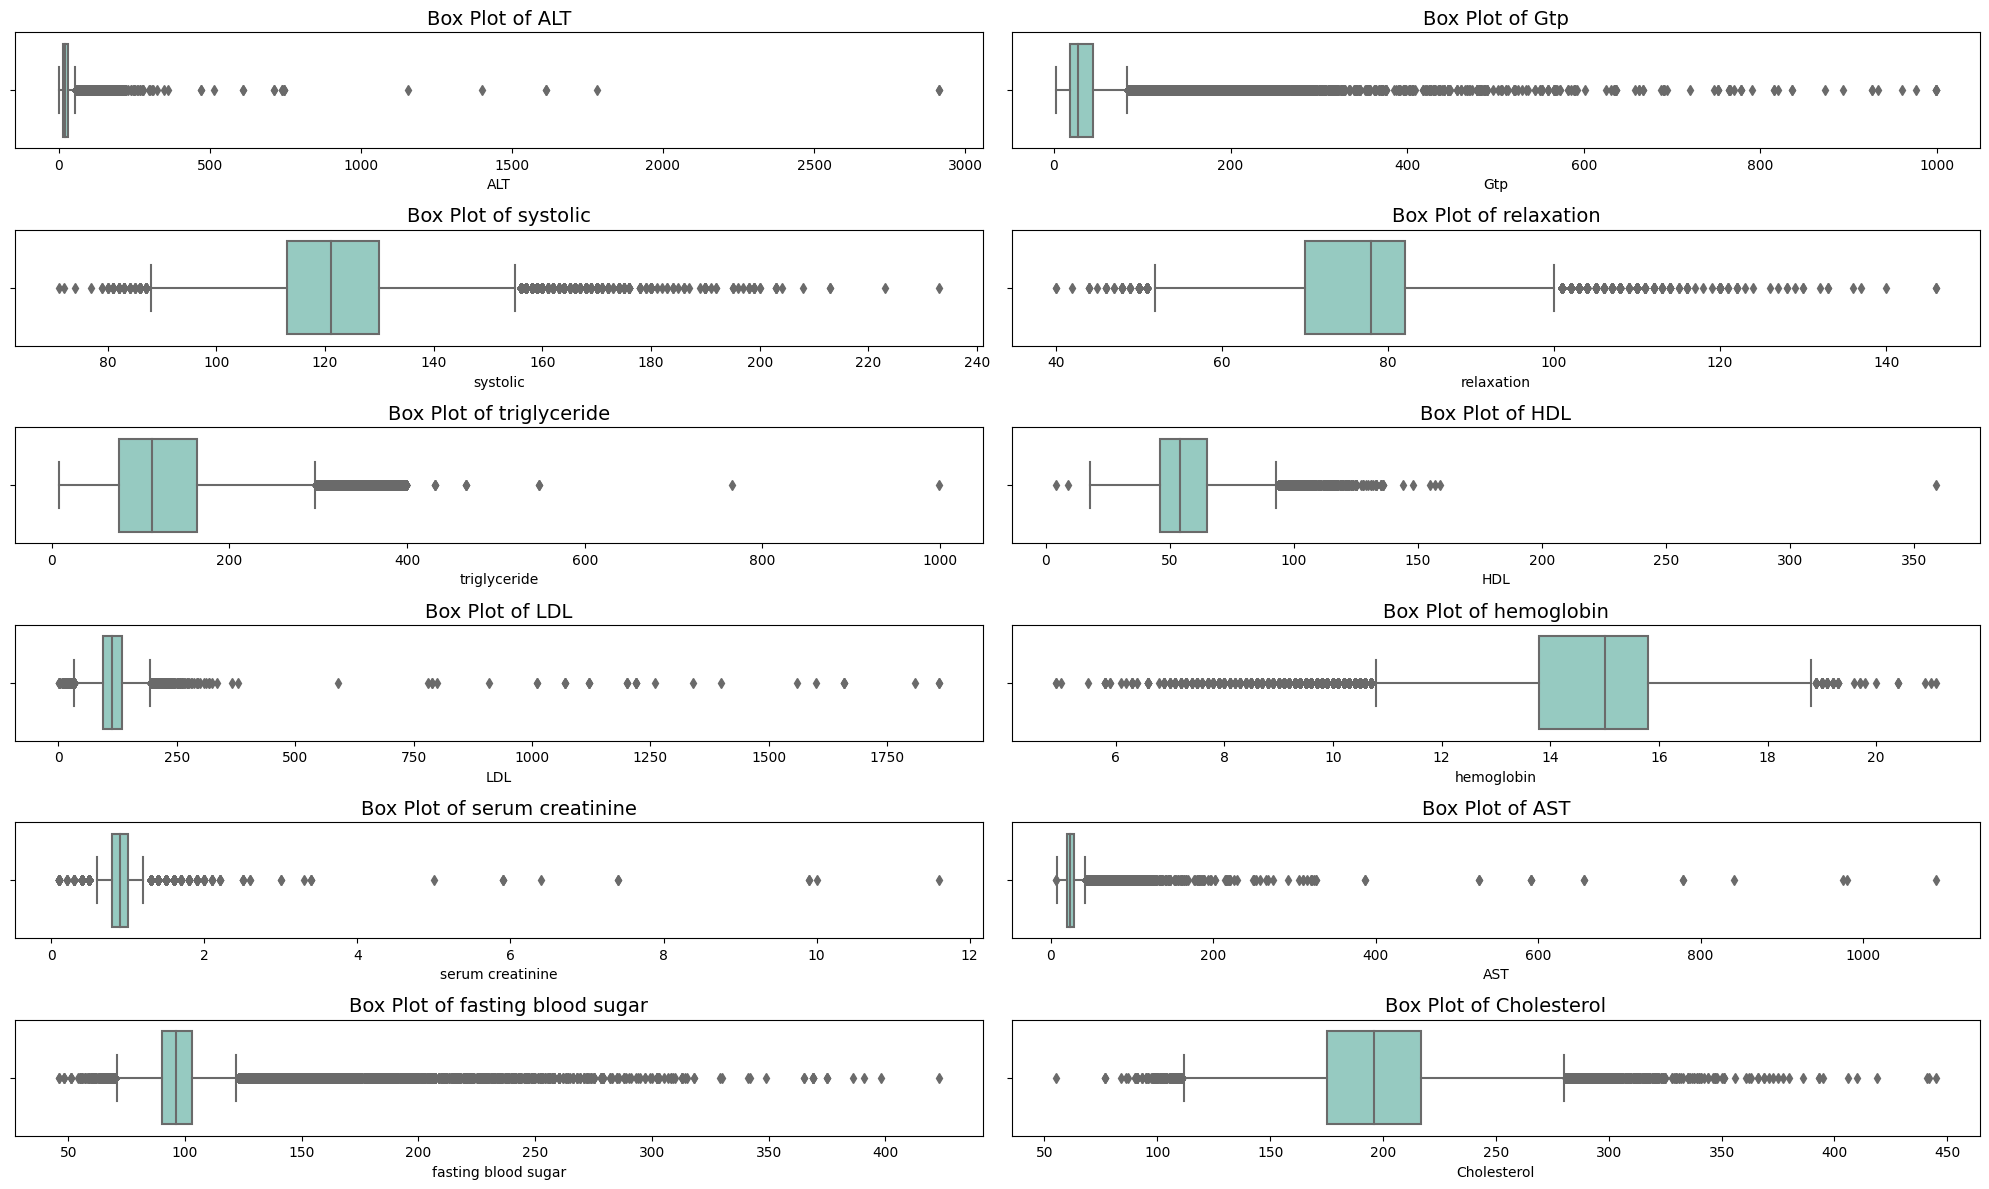

In [11]:
def prelim_eda_boxplot(df):

    columns_to_plot = ['ALT','Gtp','systolic','relaxation','triglyceride','HDL','LDL','hemoglobin','serum creatinine','AST','fasting blood sugar','Cholesterol']

    num_columns = len(columns_to_plot)
    num_rows = (num_columns + 1) // 2  # Adjust the number of rows as needed
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 12))

    # Loop over selected columns and create box plots in separate subplots
    for i, column in enumerate(columns_to_plot):
        row = i // 2
        col = i % 2
        sns.boxplot(x=df[column], ax=axes[row, col],palette="Set3")
        axes[row, col].set_title(f'Box Plot of {column}', fontsize=14)

    # Remove empty subplots (if any)
    for i in range(num_columns, num_rows * 2):
        fig.delaxes(axes.flatten()[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()
prelim_eda_boxplot(combined_train_df)

## we have some outliers that may affect our model


Here are the normal levels for the following values in the human body:

- Fasting blood sugar: 70-99 mg/dL (American Diabetes Association)
- Cholesterol: Total cholesterol < 200 mg/dL, LDL cholesterol < 100 mg/dL, HDL cholesterol > 40 mg/dL (American Heart Association)
- Triglyceride: < 150 mg/dL (American Heart Association)
- HDL: > 60 mg/dL (American Heart Association)
- LDL: < 100 mg/dL (American Heart Association)
- Hemoglobin: 12-16 g/dL for women, 14-18 g/dL for men (Mayo Clinic)
- Urine protein: < 150 mg/day (National Kidney Foundation)
- Serum creatinine: 0.6-1.3 mg/dL for men, 0.5-1.1 mg/dL for women (Mayo Clinic)
- AST: 10-40 U/L (Mayo Clinic)
- ALT: 7-56 U/L (Mayo Clinic)
- GTP: 9-48 U/L for men, 9-35 U/L for women (Mayo Clinic)
- Systolic Blood Pressure	Blood Pressure Category (Mayo Clinic)
    - Elevated: Systolic between 120-129 mm Hg
    - Hypertension stage 1: Systolic between 130-139 mm Hg
    - Hypertension stage 2: Systolic 140 mm Hg or higher
    - Hypertensive crisis: Systolic higher than 180 mm Hg

## Preprocessing and Feature Engineering
---

### we will go a head and deal with the outliers and make some new features

In [49]:
def preprocessing_newfeat(df):
    
    #Drop Id
    df = df.drop(columns=['id'])
    # Define BMI
    df['BMI'] = df['weight(kg)'] / ((df['height(cm)'] / 100) ** 2)

    # Define age groups
    bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

    # Define hypertension groups
    def hypertension_category(row):
        if row['systolic'] < 120 and row['relaxation'] < 80:
            return 'Normal'
        elif 120 <= row['systolic'] < 130 and row['relaxation'] < 80:
            return 'Elevated'
        elif 130 <= row['systolic'] < 140 or 80 <= row['relaxation'] < 90:
            return 'Hypertension Stage 1'
        elif row['systolic'] >= 140 or row['relaxation'] >= 90:
            return 'Hypertension Stage 2'
        else:
            return 'Unclassified'

    df['hypertension_group'] = df.apply(hypertension_category, axis=1)

    return df

### lets deal with those outliers now

In [57]:
def transform_outliers(df, features):
    """
    Transform outliers in the given features of the dataframe using the IQR method.

    :param df: DataFrame containing the data
    :param features: List of features in which to transform outliers
    """
    for feature in features:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile) of the feature
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the nearest bound value
        df[feature] = df[feature].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return df

In [ ]:
def master_preprocessing(df, features_to_transform):
    """
    Apply all preprocessing steps to the dataframe.

    :param df: DataFrame to be processed
    :param features_to_transform: List of features to transform outliers in
    :return: Preprocessed DataFrame
    """
    # Apply preprocessing for new features
    df = preprocessing_newfeat(df)

    # Transform outliers
    df = transform_outliers(df, features_to_transform)

    return df

In [39]:
features_to_transform = ['BMI', 'ALT', 'Gtp', 'systolic', 'relaxation', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'serum creatinine', 'AST', 'fasting blood sugar', 'Cholesterol']

# Apply preprocessing to the training and test datasets
pp_train_df = master_preprocessing(combined_train_df, features_to_transform)
pp_test_df = master_preprocessing(df1_test, features_to_transform)

# Save the processed data to CSV files
pp_train_df.to_csv('train_preprocessed.csv', index=False)
pp_test_df.to_csv('test_preprocessed.csv', index=False)

### lets take a look at our new features

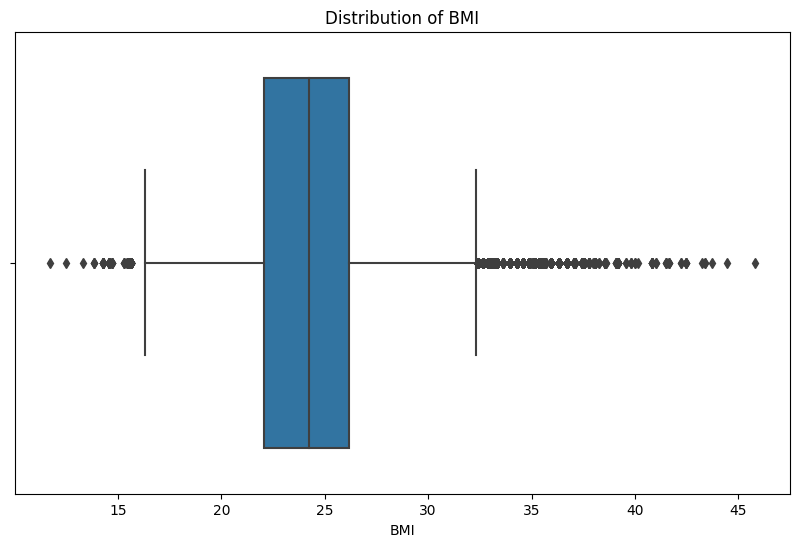

In [51]:
def create_individual_boxplots(df, numerical_features):
    """
    Create individual box plots for each numerical feature.

    :param df: DataFrame containing the data
    :param numerical_features: List of numerical features (column names) to create box plots for
    """
    for feature in numerical_features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[feature])
        plt.title(f'Distribution of {feature}')
        plt.show()

# Include only numerical features here
numerical_features = ['BMI']  # Add other numerical features as needed
create_individual_boxplots(combined_df, numerical_features)


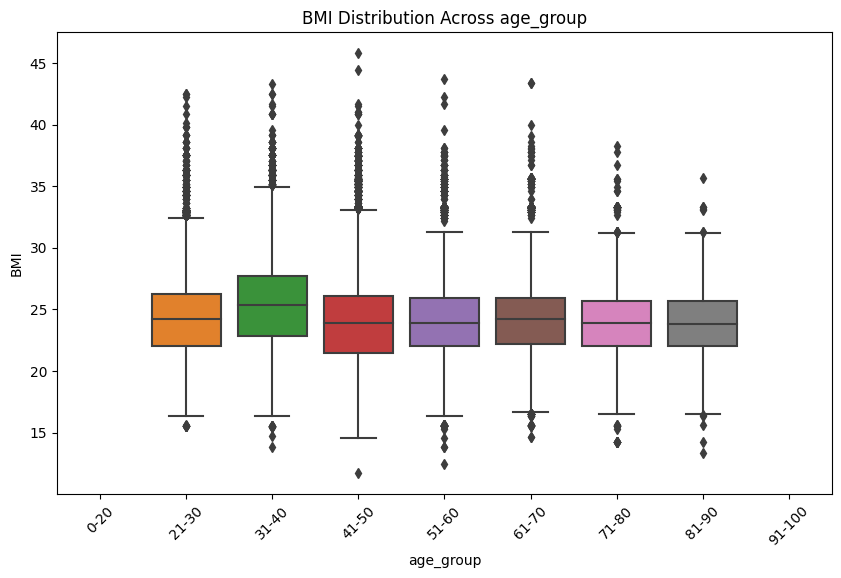

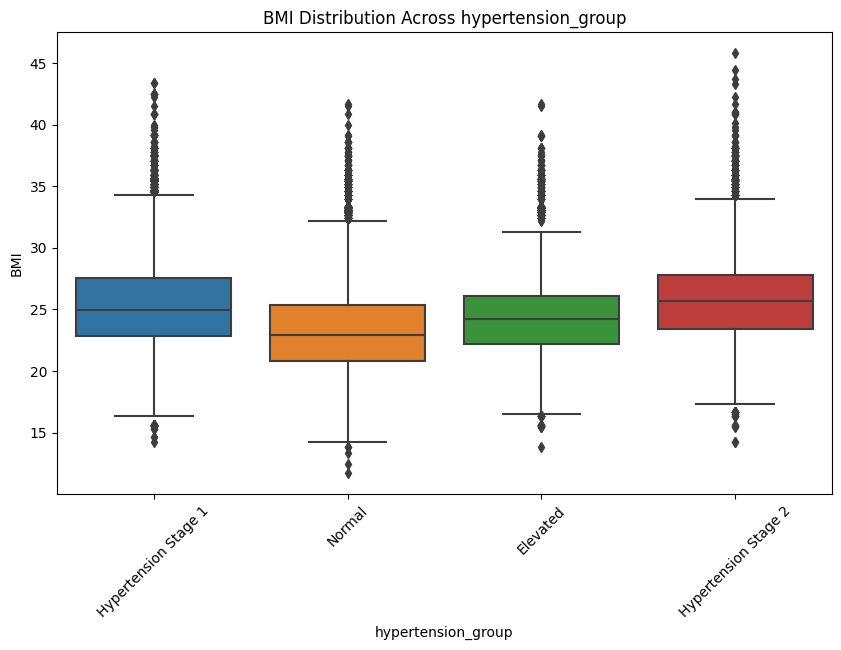

In [52]:
def create_boxplots(df, features, hue=None):
    """
    Create box plots for each feature in the provided list.

    :param df: DataFrame containing the data
    :param features: List of features (column names) to create box plots for
    :param hue: Optional; a categorical variable that will produce points with different colors.
    """
    for feature in features:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=feature, y='BMI', data=df, hue=hue)
        plt.title(f'BMI Distribution Across {feature}')
        plt.xticks(rotation=45)
        plt.show()
features_to_plot = ['age_group', 'hypertension_group']
create_boxplots(combined_df, features_to_plot)


## lets take a look at our data with the outliers dealt with

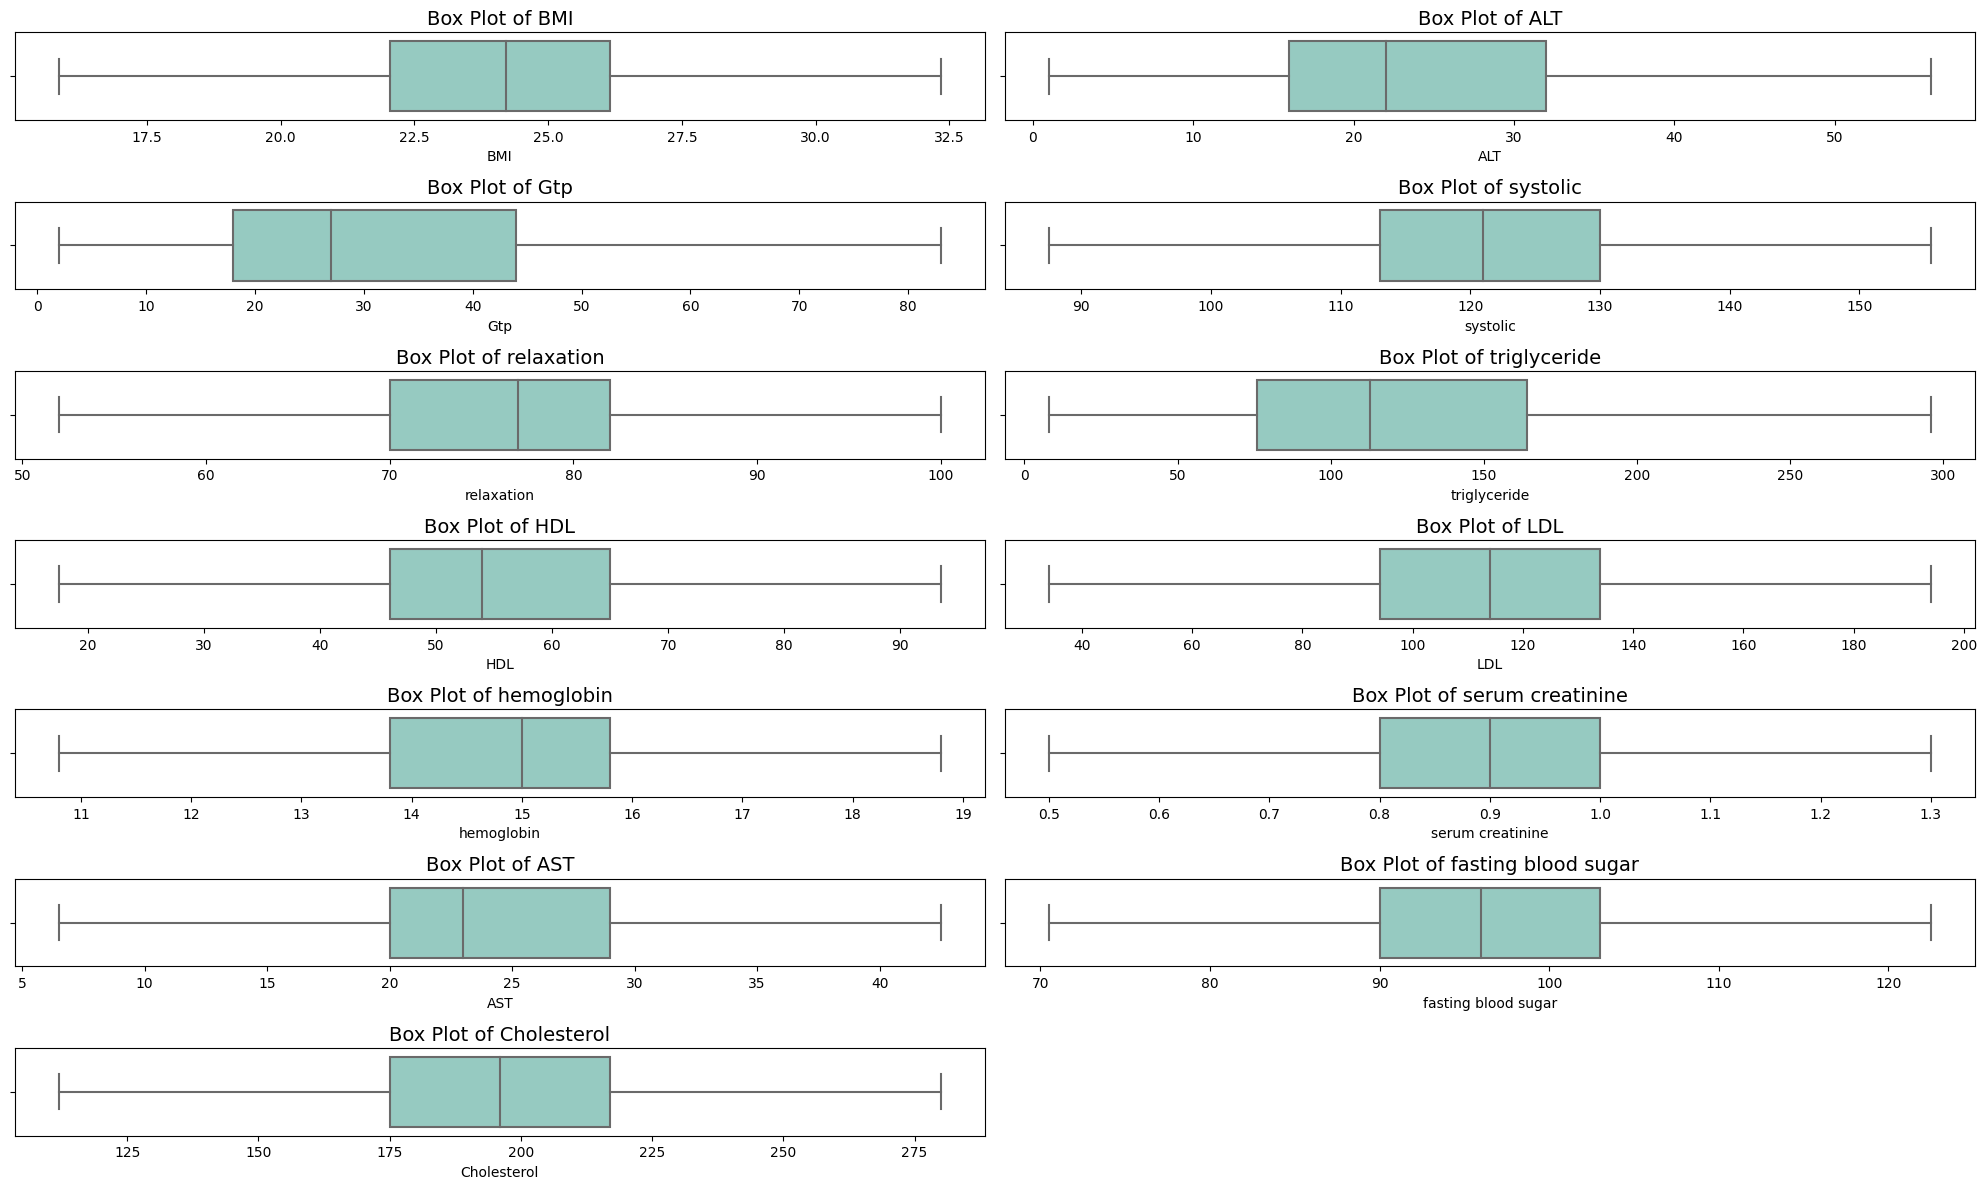

In [54]:
def prelim_eda_boxplot(df):

    columns_to_plot = ['BMI','ALT','Gtp','systolic','relaxation','triglyceride','HDL','LDL','hemoglobin','serum creatinine','AST','fasting blood sugar','Cholesterol']

    num_columns = len(columns_to_plot)
    num_rows = (num_columns + 1) // 2  # Adjust the number of rows as needed
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(20, 12))

    # Loop over selected columns and create box plots in separate subplots
    for i, column in enumerate(columns_to_plot):
        row = i // 2
        col = i % 2
        sns.boxplot(x=df[column], ax=axes[row, col],palette="Set3")
        axes[row, col].set_title(f'Box Plot of {column}', fontsize=14)

    # Remove empty subplots (if any)
    for i in range(num_columns, num_rows * 2):
        fig.delaxes(axes.flatten()[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()
prelim_eda_boxplot(combined_df)

### master preprocessing function

## Pipeline
___

In [2]:
df = pd.read_csv('train_preprocessed.csv')

# Separate features and target variable
X = df.drop(columns=["smoking"])
y = df["smoking"]

# Define numeric and categorical features
numeric_features = ['BMI','age','weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic','relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride','HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp','dental caries']
categorical_features = ['age_group', 'hypertension_group']
# Create transformers for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer()),
    ('scaler', StandardScaler()),
    ('feature_selector', SelectKBest(f_classif, k=10))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Use ColumnTransformer to apply transformers to the appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
])

In [3]:
# Define a list of classifiers and their respective hyperparameter grids
classifiers = {

    'CatBoost': (CatBoostClassifier(verbose=False), {
        #'classifier__task_type': ['GPU'],
        'classifier__loss_function': ['Logloss'],
        #'classifier__learning_rate': [0.05],
        'classifier__random_seed': [42],
        
    }),

#     'XGBoost': (XGBClassifier(tree_method='gpu_hist',gpu_id=0),{
#         'classifier__learning_rate': [0.09],  
#         'classifier__n_estimators': [99],          
#         'classifier__max_depth': [3],                
#         'classifier__subsample': [0.8],           
#         'classifier__colsample_bytree': [0.8],
#         'classifier__random_state': [42],          
#         'classifier__scale_pos_weight': [1, 2, 5],        
#         'classifier__objective': ['binary:logistic'],       
#         'classifier__eval_metric': ['auc'],
#     }),

}


# Create a dictionary to store the best models
best_models = {}
classifier_accuracies = {}
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Iterate through the classifiers and perform GridSearchCV
for clf_name, (clf, param_grid) in classifiers.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    grid_search = GridSearchCV(pipeline, param_grid, cv=stratified_kfold, n_jobs=-1, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    
    y_val_pred_proba = grid_search.predict_proba(X_val)[:, 1]
    roc_auc_val = roc_auc_score(y_val, y_val_pred_proba)
    print(f'{clf_name} ROC AUC on Validation: {roc_auc_val:.5f}')
    
    best_models[clf_name] = grid_search.best_estimator_
    best_accuracy = grid_search.best_score_
    classifier_accuracies[clf_name] = best_accuracy
    print(f'Best {clf_name} Model: {grid_search.best_params_}')
    print(f'Best {clf_name} Cross-Validation ROC AUC: {best_accuracy:.5f}')


CatBoost ROC AUC on Validation: 0.85867
Best CatBoost Model: {'classifier__loss_function': 'Logloss', 'classifier__random_seed': 42}
Best CatBoost Cross-Validation ROC AUC: 0.85713


## Submission
___

In [ ]:
final_model = best_models.get(clf_name)

# Calibrate the model
calibrated_clf = CalibratedClassifierCV(final_model, method='sigmoid', cv='prefit',ensemble=True)
calibrated_clf.fit(X_val, y_val)

# Predict using the calibrated model
X_test = pd.read_csv('../data/test_preprocessed.csv')
original_test_data = pd.read_csv('../data/test.csv')

passenger_id_df = original_test_data[['id']]
y_pred_probs = calibrated_clf.predict_proba(X_test)[:, 1]
y_pred = ["1" if prob > 0.5 else "0" for prob in y_pred_probs]


predicted_df = pd.DataFrame({'smoking': y_pred})
submission_df = pd.concat([passenger_id_df, predicted_df], axis=1)
submission_df.to_csv('submission.csv', index=False)

## References
___

- American Diabetes Association. (n.d.). Standards of Medical Care in Diabetes. Retrieved from https://care.diabetesjournals.org/content/42/Supplement_1
- American Heart Association. (n.d.). About Cholesterol. Retrieved from https://www.heart.org/en/health-topics/cholesterol/about-cholesterol
- Mayo Clinic. (n.d.). Hemoglobin test. Retrieved from https://www.mayoclinic.org/tests-procedures/hemoglobin-test/about/pac-20385075
- National Kidney Foundation. (n.d.). Protein in Urine. Retrieved from https://www.kidney.org/atoz/content/proteinuria
- American Heart Association. (n.d.). Understanding Blood Pressure Readings. Retrieved from https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings